IMplementation for data Cleaning

Step 1: Import libraies and Load Dataset

In [147]:
import pandas as pd
import numpy as np

df = pd.read_csv('Titanic-Dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Check for Duplicate Rows

In [148]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

Step 3: identify Column Data Type

In [149]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Step 4: Count Unique Values in the Categorical Columns

In [150]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

Step 5: Calculate Missing Values as Percentage

In [151]:
# df.isnull().sum()
round(df.isnull().sum() / df.shape[0] * 100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Step 6: Drop Irrelevant or Data-Heavy Missing Columns

In [152]:
df1 = df.drop(columns=['Name','Ticket','Cabin'])
df1.dropna(subset=['Embarked'], inplace=True)
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Step 7: Detect Outliers with Box Plot

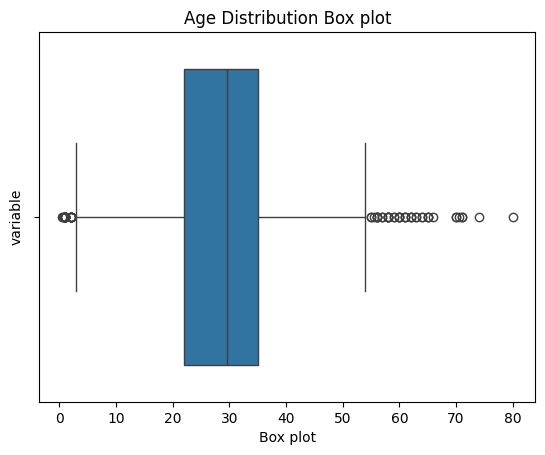

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df1['Age'])
plt.title('Age Distribution Box plot')
plt.ylabel('variable')
plt.xlabel('Box plot')

plt.show()


Step 8: Calculate Outlier Boundaries and Remove Them

In [154]:
mean = df1['Age'].mean()
std = df1['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

df2 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

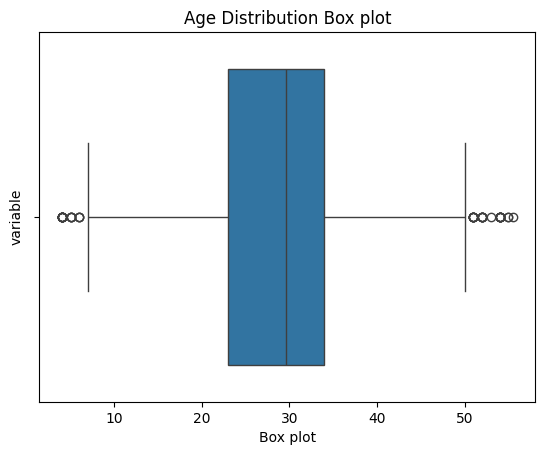

In [155]:
# check outliear
sns.boxplot(x=df2['Age'])
plt.title('Age Distribution Box plot')
plt.ylabel('variable')
plt.xlabel('Box plot')

plt.show()

Step 9: Impute Missing Data Again if Any

In [156]:
# df3 = df2.fillna(df2['Age'].mean())
# df3.isnull().sum()

df3 = df2.fillna(df2['Age'].mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Step 10: Recalculate Outlier Bounds and Remove Outliers from the Updated Data

In [157]:
mean = df3['Age'].mean()
std = df3['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print("lower_bound :",lower_bound)
print(" Upper_bound :",upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]


lower_bound : 8.978989004171453
 Upper_bound : 49.30395961288914


Step 11: Data validation and verification

In [158]:
x = df3.drop(columns=['Survived'])
y = df3['Survived']


Step 12: Data formatting

In [159]:
#min-max Scaling

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

scaler = MinMaxScaler(feature_range=(0,1))

num_col = x.select_dtypes(exclude='object').columns
cat_col = x.select_dtypes(include='object').columns


x[num_col] = scaler.fit_transform(x[num_col])


#----------encoder---------
x = pd.get_dummies(x, columns=['Embarked'], drop_first=True)

le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])



Train and predict the model with linear Regrression

In [160]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

 

In [161]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)


MOdel Evaluation

Classification Metrics

In [163]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8181818181818182
[[92 10]
 [20 43]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       102
           1       0.81      0.68      0.74        63

    accuracy                           0.82       165
   macro avg       0.82      0.79      0.80       165
weighted avg       0.82      0.82      0.81       165

